In [1]:
import os
import xlrd
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math
import datetime as dt
import copy
import matplotlib.dates as mdate
import scipy.optimize as spo
from scipy.stats import norm
import statsmodels.api as sm

In [2]:
def medianpeak(x):
    y=np.copy(x)
    ymedian=np.median(y)
    zmid=np.median(np.abs(y-np.median(y)))
    y[y<=ymedian-5.2*zmid]=(ymedian-5.2*zmid)
    y[y>=ymedian+5.2*zmid]=(ymedian+5.2*zmid)
    return y
def nondimensionalize(x):
    y=np.copy(x)
    ymean=np.mean(y)
    ystd=np.std(y)
    y=(y-ymean)/ystd
    return y
def dadjust(data):
    data0=copy.deepcopy(data)
    index1=data0.index.to_period(freq=frequency).values
    fre=np.unique(index1)
    data0.index=index1
    data0.index=data0.index.to_series().astype(str).values
    return data0

In [3]:
frequency='W'
gronum1=50
path1='C:\\Users\\wuboyuan\\Desktop\\data\\ndata\\'

In [8]:
trdayfile='C:\\Users\\wuboyuan\\Desktop\\data\\mudata\\tradeday.csv'
stfile='C:\\Users\\wuboyuan\\Desktop\\data\\mudata\\ST.csv'
stand9500='C:\\Users\\wuboyuan\\Desktop\\data\\mudata\\stand.csv'
closep='C:\\Users\\wuboyuan\\Desktop\\data\\mudata\\closeprice.csv'
mvalue0='C:\\Users\\wuboyuan\\Desktop\\data\\mudata\\marketvalue.csv'
yiziban0='C:\\Users\\wuboyuan\\Desktop\\data\\mudata\\yiziban.csv'
trdaydata=pd.read_csv(trdayfile,parse_dates=True,index_col=0)
u=trdaydata.index[0]
trdaydata=trdaydata.T
for i in range(len(trdaydata)):
    y=trdaydata.iloc[i]
    z=y[y==1].index
    if len(z)>250:
        if z[0]!=u:
                y[z[0]:z[250]]=0
        else:
            y=y
    elif len(z)==0:
        y=y
    else:
        y[z[0]:]=0
trdaydata=trdaydata.T
trdaydata0=dadjust(trdaydata)
stdata=pd.read_csv(stfile,parse_dates=True,index_col=0)
stdata0=dadjust(stdata)
stand00=pd.read_csv(stand9500,parse_dates=True,index_col=0)
stand500=dadjust(stand00)
closepr=pd.read_csv(closep,parse_dates=True,index_col=0)
closeprice=dadjust(closepr)
mvalue=pd.read_csv(mvalue0,parse_dates=True,index_col=0)
mvalue=dadjust(mvalue)
yiziban0=pd.read_csv(yiziban0,parse_dates=True,index_col=0,encoding='gbk')
yiziban0=dadjust(yiziban0)
stfre=np.unique(stdata0.index)

In [9]:
for i in range(len(stfre)-1):
    tradeday0=trdaydata0.loc[stfre[i]]
    st0=stdata0.loc[stfre[i]]
    wstand500=stand500.loc[stfre[i]]
    yzb0=yiziban0.loc[stfre[i]]
    #wcloseprice=closeprice.loc[stfre[i]]
    l=len(pd.DataFrame(st0).T)
    if i ==0:
        w_stand500=pd.DataFrame(wstand500).T
        tradeday=pd.DataFrame(tradeday0).T
        st=pd.DataFrame(st0).T
        yzb=pd.DataFrame(yzb0).T
        #w_closeprice=pd.DataFrame(wcloseprice).T
    else:
        if l!=1:
            tradeday1=tradeday0[len(tradeday0)-1:len(tradeday0)]
            tradeday=tradeday.append(tradeday1)
            st1=st0[len(st0)-1:len(st0)]
            #wcloseprice1=wcloseprice[len(wcloseprice)-1:len(wcloseprice)]
            #w_closeprice=w_closeprice.append(wcloseprice1)
            st= st.append(st1)
            yzb1=yzb0[len(yzb0)-1:len(yzb0)]
            yzb=yzb.append(yzb1)
            wstand5001= wstand500[len(wstand500)-1:len(wstand500)]
            w_stand500=w_stand500.append(wstand5001)
        else:
            tradeday2=pd.DataFrame(tradeday0).T
            tradeday=tradeday.append(tradeday2)
            st2=pd.DataFrame(st0).T
            st= st.append(st2)
            #wcloseprice2=pd.DataFrame(wcloseprice).T
            #w_closeprice=w_closeprice.append(wcloseprice2)
            wstand5002=pd.DataFrame(wstand500).T
            w_stand500=w_stand500.append(wstand5002) 
            yzb2=pd.DataFrame(yzb0).T
            yzb=yzb.append(yzb2)

In [10]:
rate500=(stand500-stand500.shift(1))/stand500.shift(1)
closerate=(closeprice-closeprice.shift(1))/closeprice.shift(1)
w_rate500=(w_stand500-w_stand500.shift(1))/w_stand500.shift(1)
w_rate500=w_rate500[1:]

In [11]:
ratefile='C:\\Users\\wuboyuan\\Desktop\\data\\mudata\\rate.csv'
errate11=pd.read_csv(ratefile,parse_dates=True,index_col=0)
errate1=dadjust(errate11)

In [16]:
file={}
name1=os.listdir(path1)

In [9]:
del name1[11]

In [17]:
name1

['cmvalue.csv',
 'EBIT息税前利润.csv',
 'marketvalue.csv',
 'PB.csv',
 'PCF.csv',
 'PE.csv',
 'PS.csv',
 '净资产收益率.csv',
 '周成交金额.csv',
 '周振幅2.csv',
 '周换手率2.csv',
 '周涨幅2.csv',
 '开盘价.csv',
 '每股公积金.csv',
 '每股收益增长率.csv',
 '营业利润率.csv',
 '营业收入增长率.csv',
 '资产负债率.csv']

In [18]:
file={}
data={}
key=[]
data0={}
fre={}
for i in range(len(name1)):
    file[i]=os.path.join(path1,name1[i])
    data[name1[i][0:-4]]=pd.read_csv(file[i],parse_dates=True,index_col=0)
    key.append(name1[i][0:-4])
    data0[key[i]]=dadjust(data[key[i]])
fre=np.unique(data0[key[len(name1)-1]].index)

In [21]:
dic={}
group={}
n_group={}
n_dic={}
all_index={}
for i in range(2):#len(fre)+1):
    tradeday0=tradeday.loc[fre[i-1]]
    dindex=tradeday0[tradeday0!=0].T.dropna().index
    ust=st.loc[fre[i-1]]
    ust=ust[ust!=1]
    yzb_index=yzb.loc[fre[i-1]]
    yzb_index=yzb_index[yzb_index==0].T.index
    d_gindex=ust[dindex].dropna().index
    d_gindex=d_gindex&yzb_index
    profit=pd.DataFrame(errate1[d_gindex].loc[fre[i-1]].dropna().astype(float))
    if i ==0:
        n_dic[i]=0
    else:
        ind=0
        for mu in range(len(key)):
            data1=data0[key[mu]].loc[fre[i-1]]
            d_gindex=d_gindex&data1.index
        for mu in range(len(key)):
            data1=data0[key[mu]].loc[fre[i-1]]
            data1=data1[d_gindex]
            data1=data1.dropna().astype(float)
            d2_gindex=data1.index&profit.index
            data1=pd.DataFrame(data1).apply(medianpeak).apply(nondimensionalize)
            data1=data1.loc[d2_gindex]
            x=sm.add_constant(data1)
            profit=profit.loc[d2_gindex]
            co_data=pd.concat([profit,data1],axis=1,join='inner')
            c_data=data1*co_data.corr().values[0][1]
            if ind==0:
                n_data=copy.deepcopy(c_data)
                ind=1
            else:
                n_data=n_data+c_data
        '''model=sm.OLS(profit,x)
            result=model.fit()
            if result.pvalues[1:2][0]<0.05:
                c_data=data1*result.params[1:2].values[0]
                if ind==0:
                    n_data=copy.deepcopy(c_data)
                    ind=1
                else:
                    n_data=n_data+c_data 
        n_data=n_data.dropna().sort_values(by=fre[i-1],ascending=False)
        n_l=len(n_data)
        for j in range(int(gronum1)):
                n_group[j]=n_data[round(((j)/int(gronum1))*n_l):round(((j+1)/int(gronum1))*n_l)].index
        n_dic[i]=copy.deepcopy(n_group)'''

In [32]:
n_data

,2009-12-28/2010-01-03
广宇发展,4.512560
新黄浦,4.411607
物产中大,4.362394
中国中期,4.332818
深圳燃气,4.243462
德豪润达,4.150889
海峡股份,4.150109
大族激光,4.040892
大恒科技,3.996428
证通电子,3.974006


In [41]:
co_data.corr().values[0][1]

0.0861914001144235

In [52]:
n_mrate=np.zeros(len(fre)-1)
n_dicrate={}
n_grorate=np.zeros(int(gronum1))
for j in range(int(gronum1)):
    for i in range(len(fre)-1):
        n_mrate[i]=errate1[n_dic[i+1][j]].loc[fre[i+1]].mean()
    n_dicrate[j]= copy.deepcopy(n_mrate)
for k in n_dicrate:
    n_grorate[k]=n_dicrate[k].mean()

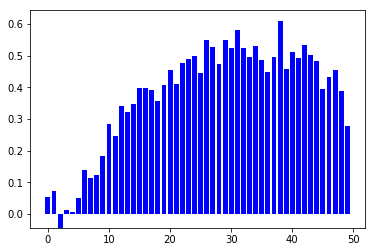

In [53]:
num=np.arange(len(n_grorate))
plt.bar(num,n_grorate, color = 'b')
plt.show()

In [54]:
unitnet0=n_dicrate[49]-0.2
unitnet=unitnet0.cumsum()
unitnet=unitnet/100+1
w_rate=w_rate500.cumsum()+1

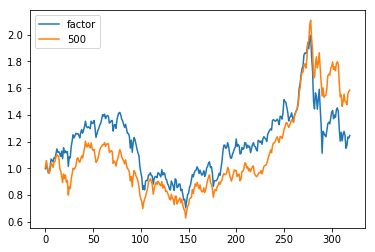

In [55]:
plt.plot(unitnet,label='factor')
plt.plot(w_rate.T.values[0][0:len(unitnet)],label='500')
plt.legend(loc=0, numpoints=1)
plt.show()

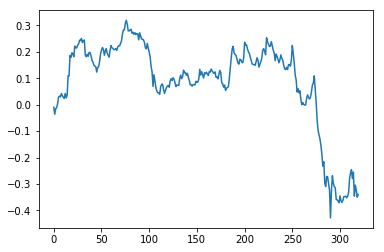

In [56]:
plt.plot(unitnet-w_rate.T.values[0][0:len(unitnet)])
plt.show()